# Latent Semantic Analysis

Latent Semantic Analysis analyze relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms. It assumes that words that are close in meaning will occur in similar pieces of text.

LSA is a unsupervised method which is helpful for data exploration, dimensionality reduction and for experimentation purposes with supervised models.

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

We will be plotting a very dense graph so let's enable notebook styled graphs. They will allow us to zoom in/out and pan so we'll be able to clearly see data we want.

In [2]:
%matplotlib notebook

In [3]:
data = open('../data/book_titles/all_book_titles.txt').read()
data = data.split('\n')
data[:10]

['Philosophy of Sex and Love A Reader',
 'Readings in Judaism, Christianity, and Islam',
 'Microprocessors Principles and Applications',
 'Bernhard Edouard Fernow: Story of North American Forestry',
 'Encyclopedia of Buddhism',
 'Motorola Microprocessor Family: 68000, 68008, 68010, 68020, 68030, and 68040, Programming and Interfacing with Applications',
 'American Anthem: Student Edition Modern Era 2007',
 'How to Read Literature Like a Professor A Lively and Entertaining Guide to Reading Between the Lines',
 'Men Are from Mars, Women Are from Venus Secrets of Great Sex, Improving Communication, Lasting Intimacy and Fulfillment, Giving and Receiving Love, Secrets of Passion, Understanding Martian',
 'Religious Traditions of the World A Journey Through Africa, Mesoamerica, North America, Judaism, Christianity, Islam, Hinduism, Buddhism, China, an']

In [4]:
stop_words = set(open('../data/general/english-stopwords.txt').read().split('\n'))
lemma = WordNetLemmatizer()

Data preprocessing is standard for a bag-of-words like structures. Only addition to the previous usecases is that we are removing words containing any numbers in order to simplify our model.

In [5]:
import re

def preprocess_text(t):
    words = re.split('; |, |\*|\n|/|_', t)
    words = [word.strip(',.:-_').lower() for word in words]
    words = [lemma.lemmatize(word) for word in words]
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if not re.search(r'\d', word)]
    return ' '.join(words)

X = [preprocess_text(r) for r in data]
X = [title for title in X if len(title) > 0]

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(X)
X.shape

(2059, 1000)

This transformer performs linear dimensionality reduction by means of truncated singular value decomposition (SVD). 

In [7]:
svd = TruncatedSVD()
Z = svd.fit_transform(X)

Plotting out multi-dimensional data converted (simplified) to 2D.

<IPython.core.display.Javascript object>


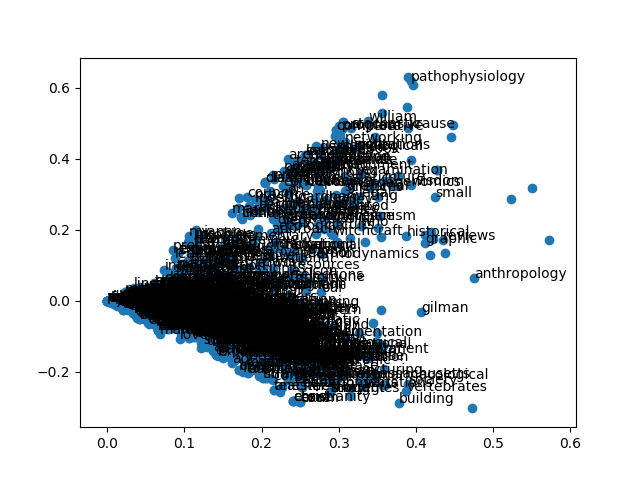

In [9]:
plt.scatter(Z[:,0], Z[:,1])

i = 0
for name in vectorizer.get_feature_names():
    plt.annotate(s=name, xy=(Z[i,0], Z[i,1]))
    i += 1